In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Rescaling(1./255),
    
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='softmax'),
    tf.keras.layers.Dense(64, activation='softmax'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 16)        0         
                                                                 
 flatten (Flatten)           (None, 3600)              0

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
1563/1563 [==============================] - 33s 13ms/step - loss: 2.1506 - accuracy: 0.2391 - val_loss: 2.0071 - val_accuracy: 0.2232
Epoch 2/100
1563/1563 [==============================] - 19s 12ms/step - loss: 1.8792 - accuracy: 0.2900 - val_loss: 1.9091 - val_accuracy: 0.2954
Epoch 3/100
1563/1563 [==============================] - 17s 11ms/step - loss: 1.7989 - accuracy: 0.3179 - val_loss: 1.7849 - val_accuracy: 0.3295
Epoch 4/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7509 - accuracy: 0.3355 - val_loss: 1.7376 - val_accuracy: 0.3443
Epoch 5/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7186 - accuracy: 0.3511 - val_loss: 1.7391 - val_accuracy: 0.3454
Epoch 6/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6999 - accuracy: 0.3578 - val_loss: 1.8511 - val_accuracy: 0.3178
Epoch 7/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6786 - accuracy: 0.3656 - val_loss: 1.771

In [7]:
import matplotlib.pyplot as plt

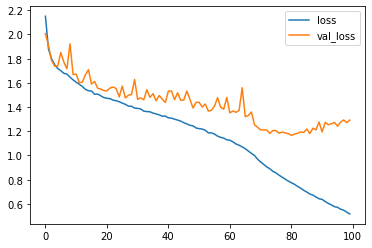

In [8]:
# plot loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

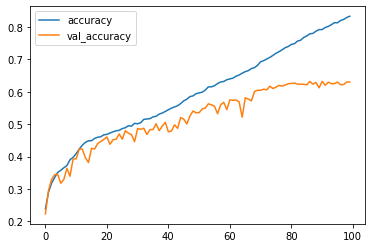

In [9]:
# plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()